# Part 3

## Introduction

### Library imports

In [109]:
# Library imports
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import json
import seaborn as sns

# Sklearn imports
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler, QuantileTransformer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix
from sklearn.linear_model import LogisticRegression

# Warnings
import warnings
warnings.filterwarnings("ignore")

### Helper function(s)

In [110]:
# Printed barrier function
def barrier():
    print("\n <<<","-"*50,">>> \n")

### Data imports

In [111]:
# Data imports
df = pd.read_json("ultimate_data_challenge.json")

## Part 3-1

### Inspect data

In [112]:
display(df.head().T)
barrier()
display(df.tail().T)

,0,1,2,3,4
city,King's Landing,Astapor,Astapor,King's Landing,Winterfell
trips_in_first_30_days,4,0,3,9,14
signup_date,2014-01-25,2014-01-29,2014-01-06,2014-01-10,2014-01-27
avg_rating_of_driver,4.7,5.0,4.3,4.6,4.4
avg_surge,1.1,1.0,1.0,1.14,1.19
last_trip_date,2014-06-17,2014-05-05,2014-01-07,2014-06-29,2014-03-15
phone,iPhone,Android,iPhone,iPhone,Android
surge_pct,15.4,0.0,0.0,20.0,11.8
ultimate_black_user,True,False,False,True,False
weekday_pct,46.2,50.0,100.0,80.0,82.4



 <<< -------------------------------------------------- >>> 



,49995,49996,49997,49998,49999
city,King's Landing,Astapor,Winterfell,Astapor,Astapor
trips_in_first_30_days,0,1,0,2,0
signup_date,2014-01-25,2014-01-24,2014-01-31,2014-01-14,2014-01-18
avg_rating_of_driver,5.0,NaN,5.0,3.0,NaN
avg_surge,1.0,1.0,1.0,1.0,1.0
last_trip_date,2014-06-05,2014-01-25,2014-05-22,2014-01-15,2014-04-20
phone,iPhone,iPhone,Android,iPhone,Android
surge_pct,0.0,0.0,0.0,0.0,0.0
ultimate_black_user,False,False,True,False,False
weekday_pct,100.0,0.0,100.0,100.0,0.0


In [113]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [114]:
df.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,50000.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000,49799.000000
mean,2.278200,4.601559,1.074764,8.849536,60.926084,5.796827,4.778158
std,3.792684,0.617338,0.222336,19.958811,37.081503,5.707357,0.446652
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.300000,1.000000,0.000000,33.300000,2.420000,4.700000
50%,1.000000,4.900000,1.000000,0.000000,66.700000,3.880000,5.000000
75%,3.000000,5.000000,1.050000,8.600000,100.000000,6.940000,5.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000


### Retained riders

In [115]:
# Convert last_trip_date and signup_date to date time
df["last_trip_date"] = pd.to_datetime(df["last_trip_date"])
df["signup_date"] = pd.to_datetime(df["signup_date"])

In [116]:
display(df.info())
barrier()
display(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    50000 non-null  object        
 1   trips_in_first_30_days  50000 non-null  int64         
 2   signup_date             50000 non-null  datetime64[ns]
 3   avg_rating_of_driver    41878 non-null  float64       
 4   avg_surge               50000 non-null  float64       
 5   last_trip_date          50000 non-null  datetime64[ns]
 6   phone                   49604 non-null  object        
 7   surge_pct               50000 non-null  float64       
 8   ultimate_black_user     50000 non-null  bool          
 9   weekday_pct             50000 non-null  float64       
 10  avg_dist                50000 non-null  float64       
 11  avg_rating_by_driver    49799 non-null  float64       
dtypes: bool(1), datetime64[ns](2), float64(6), int

None


 <<< -------------------------------------------------- >>> 



,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,50000.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000,49799.000000
mean,2.278200,4.601559,1.074764,8.849536,60.926084,5.796827,4.778158
std,3.792684,0.617338,0.222336,19.958811,37.081503,5.707357,0.446652
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.300000,1.000000,0.000000,33.300000,2.420000,4.700000
50%,1.000000,4.900000,1.000000,0.000000,66.700000,3.880000,5.000000
75%,3.000000,5.000000,1.050000,8.600000,100.000000,6.940000,5.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000


In [117]:
df["last_trip_date"].describe()

count                   50000
unique                    182
top       2014-06-29 00:00:00
freq                     2036
first     2014-01-01 00:00:00
last      2014-07-01 00:00:00
Name: last_trip_date, dtype: object

- A retained user is one that has been active in the last 30 days.
- We take the last date in the dataset and check for any activity with the 30 days prior.

In [118]:
# Fraction retained
current_date = df["last_trip_date"].max()
df["active"] = df["last_trip_date"].apply(lambda date: 0 if (current_date-date).days>30 else 1)
print(f"{round(df['active'].mean() * 100, 2)}% of users were retained")

37.61% of users were retained


- Let's build a predictive model to identify the factors associated with activity.
- Since the dataset has low dimensionality, then we do not need to reduce it using PCA or some other technique.
- We will employ the Random Forest Classifier since it is powerful for prediction and will give us insight into the importance of the features.

In [119]:
# Inspect data
display(df.info())
barrier()
display(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    50000 non-null  object        
 1   trips_in_first_30_days  50000 non-null  int64         
 2   signup_date             50000 non-null  datetime64[ns]
 3   avg_rating_of_driver    41878 non-null  float64       
 4   avg_surge               50000 non-null  float64       
 5   last_trip_date          50000 non-null  datetime64[ns]
 6   phone                   49604 non-null  object        
 7   surge_pct               50000 non-null  float64       
 8   ultimate_black_user     50000 non-null  bool          
 9   weekday_pct             50000 non-null  float64       
 10  avg_dist                50000 non-null  float64       
 11  avg_rating_by_driver    49799 non-null  float64       
 12  active                  50000 non-null  int64 

None


 <<< -------------------------------------------------- >>> 



,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver,active
count,50000.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000,49799.000000,50000.000000
mean,2.278200,4.601559,1.074764,8.849536,60.926084,5.796827,4.778158,0.376080
std,3.792684,0.617338,0.222336,19.958811,37.081503,5.707357,0.446652,0.484405
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,0.000000,4.300000,1.000000,0.000000,33.300000,2.420000,4.700000,0.000000
50%,1.000000,4.900000,1.000000,0.000000,66.700000,3.880000,5.000000,0.000000
75%,3.000000,5.000000,1.050000,8.600000,100.000000,6.940000,5.000000,1.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000,1.000000


### Clean dataset

In [120]:
# Drop rows with no phone information
df = df.drop(df[df.phone.isna()==True].index, axis=0)

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49604 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    49604 non-null  object        
 1   trips_in_first_30_days  49604 non-null  int64         
 2   signup_date             49604 non-null  datetime64[ns]
 3   avg_rating_of_driver    41578 non-null  float64       
 4   avg_surge               49604 non-null  float64       
 5   last_trip_date          49604 non-null  datetime64[ns]
 6   phone                   49604 non-null  object        
 7   surge_pct               49604 non-null  float64       
 8   ultimate_black_user     49604 non-null  bool          
 9   weekday_pct             49604 non-null  float64       
 10  avg_dist                49604 non-null  float64       
 11  avg_rating_by_driver    49406 non-null  float64       
 12  active                  49604 non-null  int64 

In [122]:
df["avg_rating_by_driver"].describe()

count    49406.000000
mean         4.777861
std          0.447114
min          1.000000
25%          4.700000
50%          5.000000
75%          5.000000
max          5.000000
Name: avg_rating_by_driver, dtype: float64

In [123]:
df["avg_rating_of_driver"].describe()

count    41578.000000
mean         4.601467
std          0.617377
min          1.000000
25%          4.300000
50%          4.900000
75%          5.000000
max          5.000000
Name: avg_rating_of_driver, dtype: float64

In [124]:
# Impute missing values with mean
df["avg_rating_by_driver"] = df["avg_rating_by_driver"].fillna(value=4.777861)
df["avg_rating_of_driver"] = df["avg_rating_of_driver"].fillna(value=4.601467)

In [125]:
# Inspect data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49604 entries, 0 to 49999
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   city                    49604 non-null  object        
 1   trips_in_first_30_days  49604 non-null  int64         
 2   signup_date             49604 non-null  datetime64[ns]
 3   avg_rating_of_driver    49604 non-null  float64       
 4   avg_surge               49604 non-null  float64       
 5   last_trip_date          49604 non-null  datetime64[ns]
 6   phone                   49604 non-null  object        
 7   surge_pct               49604 non-null  float64       
 8   ultimate_black_user     49604 non-null  bool          
 9   weekday_pct             49604 non-null  float64       
 10  avg_dist                49604 non-null  float64       
 11  avg_rating_by_driver    49604 non-null  float64       
 12  active                  49604 non-null  int64 

### Dummy variables

In [126]:
# Label encoding categorical features
df_features = pd.get_dummies(df, columns=["city", "phone", "ultimate_black_user"])
df_features.head()

,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver,active,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone,ultimate_black_user_False,ultimate_black_user_True
0,4,2014-01-25,4.7,1.10,2014-06-17,15.4,46.2,3.67,5.0,1,0,1,0,0,1,0,1
1,0,2014-01-29,5.0,1.00,2014-05-05,0.0,50.0,8.26,5.0,0,1,0,0,1,0,1,0
2,3,2014-01-06,4.3,1.00,2014-01-07,0.0,100.0,0.77,5.0,0,1,0,0,0,1,1,0
3,9,2014-01-10,4.6,1.14,2014-06-29,20.0,80.0,2.36,4.9,1,0,1,0,0,1,0,1
4,14,2014-01-27,4.4,1.19,2014-03-15,11.8,82.4,3.13,4.9,0,0,0,1,1,0,1,0


In [127]:
# Set target and drop unnecessary features
target = df_features["active"]
df_features = df_features.drop(["last_trip_date", "signup_date", "active"], axis=1)

### Exploratory Data Analysis

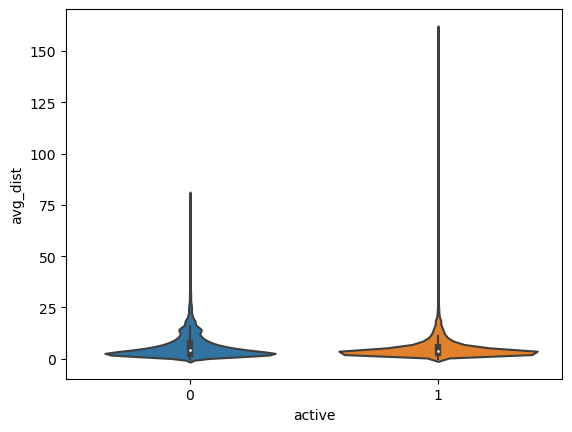

In [128]:
# Difference in average distance by activity
sns.violinplot(data=df, x="active", y="avg_dist")
plt.show()

In [129]:
pd.pivot_table(df, index="active", aggfunc={"avg_dist":["mean", "std"]})

avg_dist          
            mean       std
active                    
0       6.190725  6.184010
1       5.113930  4.617779

- Active users travel shorter distances on average
- Perhaps inactive users own cars and use ride shares more sparingly in cases of emergency

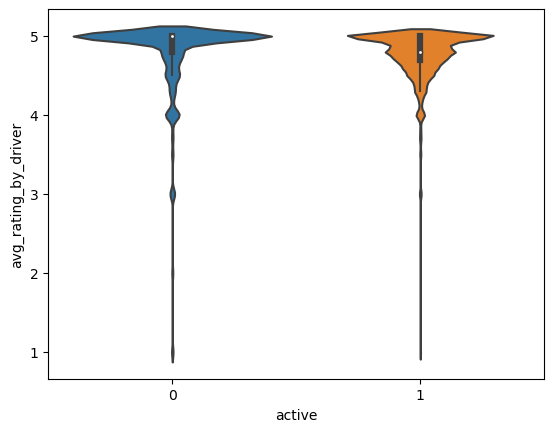

In [130]:
sns.violinplot(data=df, x="active", y="avg_rating_by_driver")
plt.show()

In [131]:
pd.pivot_table(df, index="active", aggfunc={"avg_rating_by_driver":["mean", "median", "std"]})

avg_rating_by_driver                 
                       mean median       std
active                                      
0                  4.786988    5.0  0.503848
1                  4.762739    4.8  0.328707

- Active users have a lower rating than inactive users
- This is likely because of the larger sample size for them being rated compared to inactive users

In [132]:
pd.pivot_table(df, index="active", aggfunc={"trips_in_first_30_days":["mean", "std"]})

trips_in_first_30_days          
                         mean       std
active                                 
0                    1.657033  2.655767
1                    3.304804  4.985057

- Active users took more trips in their first 30 days.

## Part 3-2

In [133]:
# Scale data
scaler = QuantileTransformer()
scaled_features = scaler.fit_transform(df_features)

In [134]:
scaled_features[:,:5]

array([[0.84634635, 0.48198198, 0.81181181, 0.81181181, 0.3013013 ],
       [0.        , 1.        , 0.        , 0.        , 0.34834835],
       [0.78028028, 0.19269269, 0.        , 0.        , 1.        ],
       ...,
       [0.        , 1.        , 0.        , 0.        , 1.        ],
       [0.66566567, 0.02402402, 0.        , 0.        , 1.        ],
       [0.        , 0.38238238, 0.        , 0.        , 0.        ]])

In [135]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(scaled_features, target, test_size=0.2, random_state=42)

### Random Forest

In [136]:
# Random forest model
rf = RandomForestClassifier(n_estimators=1000)
rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)

In [137]:
rf.score(X_test,y_test)

0.7502267916540671

In [138]:
print(cross_val_score(rf, X_test, np.ravel(y_test), cv=5))
print("Average CV Score:", np.mean(cross_val_score(rf, X_test, np.ravel(y_test), cv=5)))

[0.7511335  0.74647177 0.74798387 0.74647177 0.74445565]
Average CV Score: 0.7480088059640855


In [139]:
df_importance = pd.DataFrame(zip(list(df_features.columns), rf.feature_importances_),
                             index=range(df_features.columns.shape[0]),
                             columns=["feature","importance"])
df_importance.sort_values(by="importance", ascending=False)

,feature,importance
5,avg_dist,0.299513
4,weekday_pct,0.133008
6,avg_rating_by_driver,0.114010
1,avg_rating_of_driver,0.081947
0,trips_in_first_30_days,0.080275
3,surge_pct,0.079424
2,avg_surge,0.065772
8,city_King's Landing,0.047042
10,phone_Android,0.020121
11,phone_iPhone,0.019229


- Average distance driven, weekday percentage, rating given to the passenger by the driver have high importance.
- City, phone type, and ultimate black user stats have low importance

In [140]:
# More metrics
precision_recall_fscore_support(y_test, y_pred)

(array([0.79977448, 0.66738486]),
 array([0.80080645, 0.66595001]),
 array([0.80029014, 0.66666667]),
 array([6200, 3721], dtype=int64))

In [141]:
# Weighted metrics
precision_recall_fscore_support(y_test, y_pred, average="weighted")

(0.7501200365926461, 0.7502267916540671, 0.7501729166540753, None)

In [142]:
# Confusion matrix
confusion_matrix(y_test, y_pred)

array([[4965, 1235],
       [1243, 2478]], dtype=int64)

### Logistic Regression

In [143]:
logit = LogisticRegression(solver="lbfgs")
param_grid = {"C": np.arange(0.5,5.1,0.1)}
grid = GridSearchCV(logit, param_grid, cv=5)
grid.fit(X_train, np.ravel(y_train))

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7,
       1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. ,
       3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3,
       4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. ])})

In [144]:
grid.best_estimator_.C

1.0999999999999999

In [145]:
# Coefficients from Logistic Regression
logit_coef = LogisticRegression(C=grid.best_estimator_.C)
logit_coef.fit(X_train, y_train)
df_coef = pd.DataFrame(zip(list(df_features.columns), logit_coef.coef_[0]),
                       index=range(df_features.columns.shape[0]),
                       columns=["feature","coefficient"])
df_coef

,feature,coefficient
0,trips_in_first_30_days,0.109892
1,avg_rating_of_driver,-0.328284
2,avg_surge,2.665923
3,surge_pct,-1.596387
4,weekday_pct,-0.255769
5,avg_dist,0.152542
6,avg_rating_by_driver,-1.337993
7,city_Astapor,-0.771206
8,city_King's Landing,1.114170
9,city_Winterfell,-0.250911


In [146]:
print(np.mean(cross_val_score(grid, X_test, np.ravel(y_test), cv=5)))

0.7430704070853984


- The accuracy from Logistic Regression (74%) is slightly lower than from Random Forest (75%).

## Part 3-3
- Briefly discuss how Ultimate might leverage the insights gained from the model to improve its long term rider retention (again, a few sentences will suffice).

In [148]:
# Mean and std for important features
f = ["trips_in_first_30_days","avg_rating_of_driver","avg_surge",
     "surge_pct","weekday_pct","avg_dist","avg_rating_by_driver"]

for i in f:
    print(i,":")
    print(pd.pivot_table(df, index="active", aggfunc={i:["mean", "std"]}))
    barrier()

trips_in_first_30_days :
       trips_in_first_30_days          
                         mean       std
active                                 
0                    1.657033  2.655767
1                    3.304804  4.985057

 <<< -------------------------------------------------- >>> 

avg_rating_of_driver :
       avg_rating_of_driver          
                       mean       std
active                               
0                  4.606113  0.591542
1                  4.593770  0.518625

 <<< -------------------------------------------------- >>> 

avg_surge :
       avg_surge          
            mean       std
active                    
0       1.075689  0.251969
1       1.073834  0.162905

 <<< -------------------------------------------------- >>> 

surge_pct :
       surge_pct           
            mean        std
active                     
0       8.700091  22.221133
1       9.165615  15.599652

 <<< -------------------------------------------------- >>> 

weekday_pct

<ins>**The model:**</ins>  
- We have a reasonably accurate (75%) Random Forest Model to use for the future.

<ins>**Some key features:**</ins>  
- **trips in the first 30 days**:
    - The higher this feature, the higher the likelihood of becoming an active user.
    - This metric may not leave much room for manoeuvering as people who actively need to use a ride share will use it more in the first 30 days.
    - Ultimate could consider incentivising rides in the first few weeks of usage or the first x rides (x could be decided internally). Getting riders used to using the app early could show long term benefits. They would, however, need to be wary of individuals making multiple dummy accounts just to take advantage of this with no intention of becoming active.

- **weekday percentage**:
    - The higher this feature, the higher the likelihood of being an active user.
    - This metric may suggest that active users are using the app for work or other routine daily activities done during the week.
    - Location data can be leveraged to predict the trips that users make very frequently and then prompt the user to start book fares around that time daily.

- **average rating by driver** AND **average rating by driver**:
    - Give the users and drivers specific sub-parameters besides the overall rating eg cleanliness, friendliness, timeliness, going above and beyond etc.
    - Also reward users and drivers with consistently higher ratings to improve both rider and driver satisfaction.